In [111]:
import os, numpy as np, pandas as pd, cv2, json, seaborn as sns

import matplotlib.pyplot as plt
from PIL import Image

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



Define the data paths

In [112]:
train_path = "/home/venkata_v/cgg23/Spring23_CGG/data/raw/CGG_data/"

train_10x_path = train_path + "train/10x/"
train_8x_path = train_path + "train/8x/"
train_gt_path = train_path + "train/gt/"

test_senti_path = train_path + "senti_test/"
test_ge_path = train_path + "ge_test/"

json_path = train_path + "train/training.json"


Plot a random sample image and compare all the resolutions

<AxesSubplot:>

Text(0.5, 1.0, '10x')

<AxesSubplot:>

Text(0.5, 1.0, '8x')

<AxesSubplot:>

Text(0.5, 1.0, 'gt')

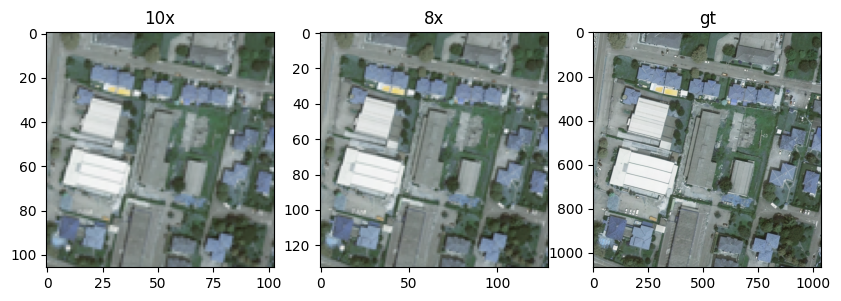

In [113]:
file_no=3194


filepath10 = train_10x_path + str(file_no) + ".png"
filepath8 = train_8x_path + str(file_no) + ".png"
filepathgt = train_gt_path + str(file_no) + ".png"
pic10 = cv2.imread(filepath10)
pic8 = cv2.imread(filepath8)
picgt = cv2.imread(filepathgt)

fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,3,1)
plt.imshow(pic10)
plt.title("10x")
fig.add_subplot(1,3,2)
plt.imshow(pic8)
plt.title("8x")
fig.add_subplot(1,3,3)
plt.imshow(picgt)
plt.title("gt")
plt.show()

Analyze the properties of images

In [114]:
with open(json_path, 'r') as f:
  train_json = json.load(f)

gt_width=[]
gt_height=[]
tenx_width=[]
tenx_height=[]
eightx_width=[]
eightx_height=[]
for i in range(len(train_json['images'])):
  gt_width.append(train_json['images'][i]['gt']['width'])
  gt_height.append(train_json['images'][i]['gt']['height'])
  tenx_width.append(train_json['images'][i]['10x']['width'])
  tenx_height.append(train_json['images'][i]['10x']['height'])
  eightx_width.append(train_json['images'][i]['8x']['width'])
  eightx_height.append(train_json['images'][i]['8x']['height'])


<AxesSubplot:>

Text(0.5, 1.0, 'width distribution')

<AxesSubplot:>

Text(0.5, 1.0, 'height distribution')

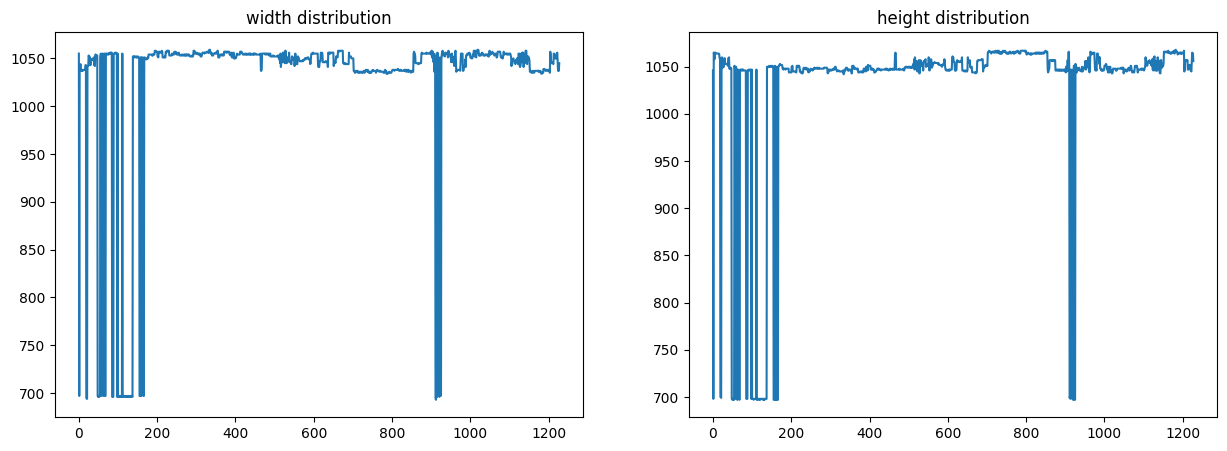

In [115]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
plt.plot(gt_width)
plt.title("width distribution")

fig.add_subplot(1,2,2)
plt.plot(gt_height)
plt.title("height distribution")


In [80]:
np.unique(gt_width, return_counts=True)
np.unique(gt_height, return_counts=True)


(array([ 693,  694,  695,  696,  697,  698, 1034, 1035, 1036, 1037, 1038,
        1039, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050,
        1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059]),
 array([  1,   2,   2,  26,  43,   4,   6,  35,  54,  84,  59,   3,   8,
         14,   6,  23,  36,  27,  30,   9,  27,  43,  58,  70,  69, 130,
        185,  79,  51,  39,   5]))

(array([ 697,  698,  699,  700,  701, 1042, 1043, 1044, 1045, 1046, 1047,
        1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058,
        1059, 1060, 1061, 1063, 1064, 1065, 1066, 1067, 1068]),
 array([ 28,  44,   3,   2,   1,   1,  15,  56,  51, 118, 172, 118,  55,
         65,  52,  40,  14,  20,  23,  30,  41,  10,   9,  17,   2,  10,
         79,  77,  47,  27,   1]))

In [97]:
#function taken from ep_eda.ipynb

def get_all_image_dim(path):
    img_dimensions = []
    for fn in os.listdir(path):
        img = Image.open(path + fn)
        width, height = img.size
        img_dimensions.append([width, height])
    return img_dimensions

In [104]:
test_ge_dim = np.array(get_all_image_dim(test_ge_path))
test_senti_dim = np.array(get_all_image_dim(test_senti_path))
np.unique(test_ge_dim[:,0], return_counts=True)
np.unique(test_senti_dim[:,0], return_counts=True)

(array([125]), array([100]))

(array([128]), array([100]))

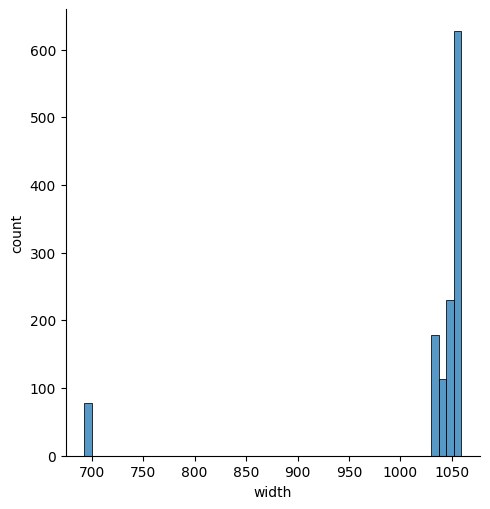

In [109]:
sns.displot(gt_width,bins=50).set(xlabel='width', ylabel='count')  

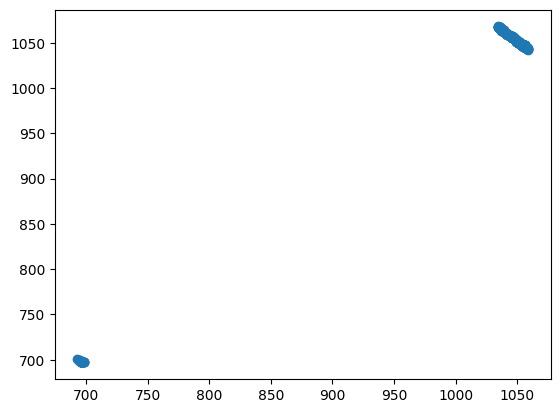

In [119]:
plt.scatter(gt_width,gt_height)